In [1]:
import os
import sys
import numpy as np
import numpy.random as nrand
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import scipy
import scipy.sparse.linalg
from scipy.linalg import hadamard
from scipy.sparse import csr_matrix
currentdir = os.path.abspath('')
targetdir = os.path.dirname(currentdir)+'/utils'
sys.path.append(targetdir)
from utils import *

In [2]:
model = 'NK' # Type of theoretical landscape model: 'NK', 'RMF', 'Polynomial'
N = 10 # Number of variable sites: 5, 10, 15
metric = 'open_ratio' # Type of metrics: 'N_max', 'epi', 'r_s', 'open_ratio','E', 'gamma', 'adptwalk_steps', 'adptwalk_probs'


In [357]:
# Load plotting data that contain ruggedness information
with open(f'../2_Effect_of_Measurement_Error/plot_data/plot_df_{model}_{N}_{metric}.pkl','rb') as f:
    plot_df = pickle.load(f)
    
ruggedness_list = plot_df[plot_df['std'] == 0.02][f'{metric}_T'].to_numpy().reshape(100,10)

(array([ 4.,  1.,  7., 19.,  9., 19., 26., 29., 44., 49., 64., 68., 58.,
        52., 66., 50., 51., 47., 48., 40., 29., 22., 49., 58., 41., 27.,
         5.,  6.,  5.,  7.]),
 array([2.85558853, 2.95139147, 3.04719441, 3.14299735, 3.23880029,
        3.33460324, 3.43040618, 3.52620912, 3.62201206, 3.717815  ,
        3.81361795, 3.90942089, 4.00522383, 4.10102677, 4.19682971,
        4.29263266, 4.3884356 , 4.48423854, 4.58004148, 4.67584443,
        4.77164737, 4.86745031, 4.96325325, 5.05905619, 5.15485914,
        5.25066208, 5.34646502, 5.44226796, 5.5380709 , 5.63387385,
        5.72967679]),
 <a list of 30 Patch objects>)

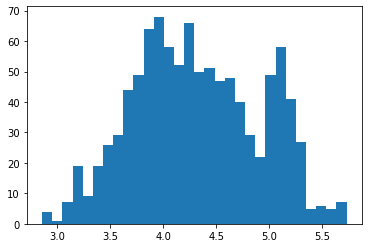

In [359]:
# View the overall distribution of ruggedness
plt.hist(ruggedness_list.flatten(),bins=30)

In [360]:
# choose three levels of ruggedness according to 10th, 20th, 50th, and 80th percentile.
print(np.percentile(ruggedness_list.flatten(),[10,20,50,80]))

[3.59109578 3.80349412 4.26421569 4.95127202]


In [369]:
Landscape_list_3X10 = {}

In [380]:
# Manually select fitness landscapes according to their ruggedness
# Adjust mean and d until there are enough qualified FLs. 
mean = 5
d = 0.008
row,column = np.where((ruggedness_list<=mean+d) & (ruggedness_list>=mean-d))
print(len(row))
idx_list = nrand.choice(len(row),10,replace = False)

13


In [381]:
# Select those FLs
tmp_list = []
for idx in idx_list:
    tmp_list.append(NK_landscape_list[row[idx]+1][column[idx]])

In [382]:
# Attach to FL list
Landscape_list_3X10[1] = tmp_list

In [55]:
# with open(f'../FL_data_3X10/{model}{N}_{metric}_landscape_3X10.pkl','wb') as f:
#     pickle.dump(Landscape_list_3X10,f)